In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


df = pd.read_csv('./listings.csv')
df.head()
df.shape

(3818, 92)

In [168]:
df_new= df[['review_scores_value', 'price','reviews_per_month']]

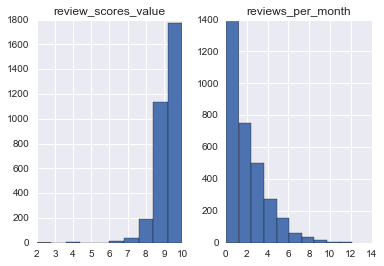

In [139]:
df_new.hist();

In [169]:
def clean_price_field(df, fieldname):
    df[fieldname] = [x.strip('$') for x in df[fieldname]]
    df[fieldname] = [x.replace(',','') for x in df[fieldname]]
    df[fieldname] = [x.strip('.00') for x in df[fieldname]]
    df[fieldname] = df_new[fieldname].astype(float)
    return df_new[fieldname]



In [170]:
df_new['price'] = clean_price_field(df_new, 'price')
df_new['price'].head()

/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

0     85
1     15
2    975
3      1
4     45
Name: price, dtype: float64

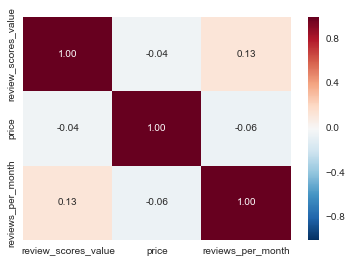

In [8]:
sns.heatmap(df_new.corr(), annot=True, fmt=".2f");

In [10]:
df_dropna = df_new.dropna(axis=0)

In [12]:
# Consider only numerica variables
X = df_dropna[['review_scores_value','reviews_per_month']]
y = df_dropna['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.000791798715149 on 949 values.'

In [19]:
drop_price_df = df_new.dropna(subset=['price']) #Drop the rows with missing salaries

# test look
drop_price_df.head()
drop_price_df.shape


(3818, 3)

In [20]:
fill_df = drop_price_df.fillna(drop_price_df.mean()) #Fill all missing values with the mean of the column.

# test look
fill_df.head()

,review_scores_value,price,reviews_per_month
0,10.000000,85,4.070000
1,10.000000,15,1.480000
2,10.000000,975,1.150000
3,9.452245,1,2.078919
4,9.000000,45,0.890000


In [21]:
# Consider only numerical variables
X = fill_df[['review_scores_value','reviews_per_month']]
y = fill_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.00535769754785 on 1146 values.'

In [52]:
cat_df = df.select_dtypes(include=['object']).copy()

cat_df.shape[1]

62

In [34]:
len(cat_df.columns[cat_df.isnull().mean() == 0])
len(cat_df.columns[cat_df.isnull().mean() > 0.5])
len(cat_df.columns[cat_df.isnull().mean() > 0.75])

0

In [67]:
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
#My Solution    
    df = pd.get_dummies(df,columns=cat_cols,dummy_na=dummy_na,prefix_sep='_');
    return df
#     for col in  cat_cols:
#         try:
#             #for each cat add dummy var, drop original column
#             df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
#         except:
#             continue
#     return df
        
     

In [110]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    df = df.dropna(subset=[response_col]);
    df = df.dropna(how='all', axis=1);
    df = create_dummy_df(df, cat_cols, dummy_na);
    df[response_col] = clean_price_field(df, response_col);
   
    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    X = df.drop(response_col, axis=1);
  
    y = df[[response_col]]
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state);
    ln_model = LinearRegression(normalize=True);
    ln_model.fit(X_train, y_train)
    ypreds_train = ln_model.predict(X_train);
    train_score = r2_score(y_train, ypreds_train)
    ypreds_test = ln_model.predict(X_test);
    test_score = r2_score(y_test, ypreds_test);

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

# X=clean_fit_linear_mod(df_new, 'Salary', cat_cols_lst, dummy_na=False)
# X
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df, 'price', cat_cols_lst, dummy_na=False)

KeyError: 'price'

In [161]:
df_cal = pd.read_csv('./calendar.csv')
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [165]:
sorted_list = df_cal.sort_values(by=["listing_id","date"])
sorted_list.head()

sorted_list["price"] =  sorted_list["price"].astype(str) //Because the clean price field was giving error that the price is a float object
sorted_list.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [171]:
sorted_list['price'] = clean_price_field(sorted_list, "price")

In [174]:
spring_sum = 0
spring_count = 1
for index, row in sorted_list.iterrows():
    if row['date'] >="2016-03-01" and row['date'] <="2016-05-31":
        if(row['available']=='t'):
            spring_sum += row['price']
            spring_count += 1

print(spring_sum)
print(spring_count)
print("spring mean: " + str(spring_sum/spring_count))
    

nan
239947
spring mean: nan
